#Make sure to upload your heart_disease_uci.csv file if you recived any issue.

In [ ]:
from google.colab import files
import os
##This part checks if the file is already exists in colab or not
if not os.path.exists('heart_disease_uci.csv'):
  #if not, make the user upload the CSV file
  uploaded = files.upload()

#will be deleted when we have finished

#Heart Diesease - EDA | Preprocessing | Building and deploying ML models




<img src="https://i.ibb.co/ZHgtDmZ/download-1.jpg">

By Data Dynamics:
 * Faisal Ali : [LinkedIn](https://www.linkedin.com/in/bawazirfaisal/)
 * Lina Ahmed: [linkedIn](https://www.linkedin.com/in/lina-ahmed-0b2085159?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BO3q1IH47QrimdClcVsYwog%3D%3D)
 * Nada Ali : Linkedin_link (or any link)
 * Abdallah Mohammed : Linkedin_link (or any link)
 * Samar : Linkedin_link (or any link)

#About Dataset:




##Context:



This dataset is multivariate, involving a variety of separate mathematical or statistical variables for analysis. It comprises 14 attributes: age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy (ca), and thalassemia. Originally containing 76 attributes, ML researchers typically focus on this subset of 14 attributes from the Cleveland database. The primary objectives with this dataset are predicting whether a patient has heart disease based on these attributes and exploring insights to aid in understanding the problem further.

Source: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?select=heart_disease_uci.csv

##Content:


1. **id:** Unique identifier for each patient (numerical).

2. **age:** Age of the patient in years (numerical).

3. **dataset:** Place of study or origin (categorical).
  * Cleveland
  * Hungary
  * Switzerland
  * VA Long Beach

4. **sex:** Gender of the patient (categorical: Male/Female).

5. **cp:** Chest pain type (categorical):

  * Typical angina
  * Atypical angina
  * Non-anginal pain
  * Asymptomatic
6. **trestbps:** Resting blood pressure (numerical, in mm Hg).

7. **chol:** Serum cholesterol level in mg/dl (numerical).

8. **fbs:** Fasting blood sugar > 120 mg/dl (Boolean: True/False).

9. **restecg:** Resting electrocardiographic results (categorical):

  * Normal
  * ST-T wave abnormality
  * Left ventricular hypertrophy
10. **thalach:** Maximum heart rate achieved during exercise (numerical).

11. **exang:** Exercise-induced angina (Boolean: True/False).

12. **oldpeak:** ST depression induced by exercise relative to rest (numerical).

13. **slope:** The slope of the peak exercise ST segment (categorical).
  * downsloping
  * flat
  * upsloping
14. **ca:** Number of major vessels colored by fluoroscopy (numerical, range 0-3).

15. **thal:** Thalassemia (categorical):

  * Normal
  * Fixed defect
  * Reversible defect
16. **num:** Predicted attribute (target variable, numerical).

More explanation: [EXPLAINED](https://docs.google.com/document/d/1uQySS8flWbSrr_2nH-NDJd8dQTVlxioyEA8YM_X4G4k/edit?usp=sharing)

#Notebook Objectives
  * Exploratory Data Analysis
   * understand the structure of the dataset
  * Visualization of the data
    * visualize the data
  * Data Preprocessing
    * handle missing values and outliers
    * encode categorical variables and scale features
    * prepare data for modeling
  * Model tuning and building
    * Define ML models for predicting heart disease
    * preform hyperparameter tuning using different techniques
  * Model selection
    * compare and evaluate the accuracy of different models
  * Model Deployment
    * prepare the chosen model
    * Save the model

#1- Importing libraries

In [ ]:
# For data handling
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing and ML
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Applying various models to perform multiclass classification and evaluating their performance
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score

#2-  Load the dataset

In [ ]:
df = pd.read_csv('/content/heart_disease_uci.csv')



---


#EDA (Exploratory Data Analysis)


In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.000,233.000,True,lv hypertrophy,150.000,False,2.300,downsloping,0.000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000,286.000,False,lv hypertrophy,108.000,True,1.500,flat,3.000,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.000,229.000,False,lv hypertrophy,129.000,True,2.600,flat,2.000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000,250.000,False,normal,187.000,False,3.500,downsloping,0.000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000,204.000,False,lv hypertrophy,172.000,False,1.400,upsloping,0.000,normal,0


In [ ]:
categorical_columns = {
    'thal': 'thalassemia',
    'slope': 'slope_st_segment',
    'exang': 'exercise_induced_angina',
    'restecg': 'resting_ecg_results',
    'fbs': 'fasting_blood_sugar',
    'cp': 'chest_pain_type',
    'ca': 'num_major_vessels',
    'chol': 'serum_cholesterol',
    'thalch': 'max_heart_rate',
    'trestbps': 'resting_blood_pressure',
    'oldpeak': 'st_depression',
    'num': 'target'
}
df.rename(columns=categorical_columns, inplace=True)
df.head()

,id,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,slope_st_segment,num_major_vessels,thalassemia,target
0,1,63,Male,Cleveland,typical angina,145.000,233.000,True,lv hypertrophy,150.000,False,2.300,downsloping,0.000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000,286.000,False,lv hypertrophy,108.000,True,1.500,flat,3.000,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.000,229.000,False,lv hypertrophy,129.000,True,2.600,flat,2.000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000,250.000,False,normal,187.000,False,3.500,downsloping,0.000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000,204.000,False,lv hypertrophy,172.000,False,1.400,upsloping,0.000,normal,0


In [ ]:
pd.set_option('display.float_format', lambda x : '%.3f' % x)
df.drop(columns=['id']).describe().transpose()   #Statistics

,count,mean,std,min,25%,50%,75%,max
age,920.000,53.511,9.425,28.000,47.000,54.000,60.000,77.000
resting_blood_pressure,861.000,132.132,19.066,0.000,120.000,130.000,140.000,200.000
serum_cholesterol,890.000,199.130,110.781,0.000,175.000,223.000,268.000,603.000
max_heart_rate,865.000,137.546,25.926,60.000,120.000,140.000,157.000,202.000
st_depression,858.000,0.879,1.091,-2.600,0.000,0.500,1.500,6.200
num_major_vessels,309.000,0.676,0.936,0.000,0.000,0.000,1.000,3.000
target,920.000,0.996,1.143,0.000,0.000,1.000,2.000,4.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       920 non-null    int64  
 1   age                      920 non-null    int64  
 2   sex                      920 non-null    object 
 3   dataset                  920 non-null    object 
 4   chest_pain_type          920 non-null    object 
 5   resting_blood_pressure   861 non-null    float64
 6   serum_cholesterol        890 non-null    float64
 7   fasting_blood_sugar      830 non-null    object 
 8   resting_ecg_results      918 non-null    object 
 9   max_heart_rate           865 non-null    float64
 10  exercise_induced_angina  865 non-null    object 
 11  st_depression            858 non-null    float64
 12  slope_st_segment         611 non-null    object 
 13  num_major_vessels        309 non-null    float64
 14  thalassemia              4

In [ ]:
#Count of duplicate rows in our data
duplicates = df.drop(columns=['id']).duplicated().sum()
print("Number of duplicate rows in train_data:", duplicates)

Number of duplicate rows in train_data: 2


In [ ]:
df.shape

(920, 16)

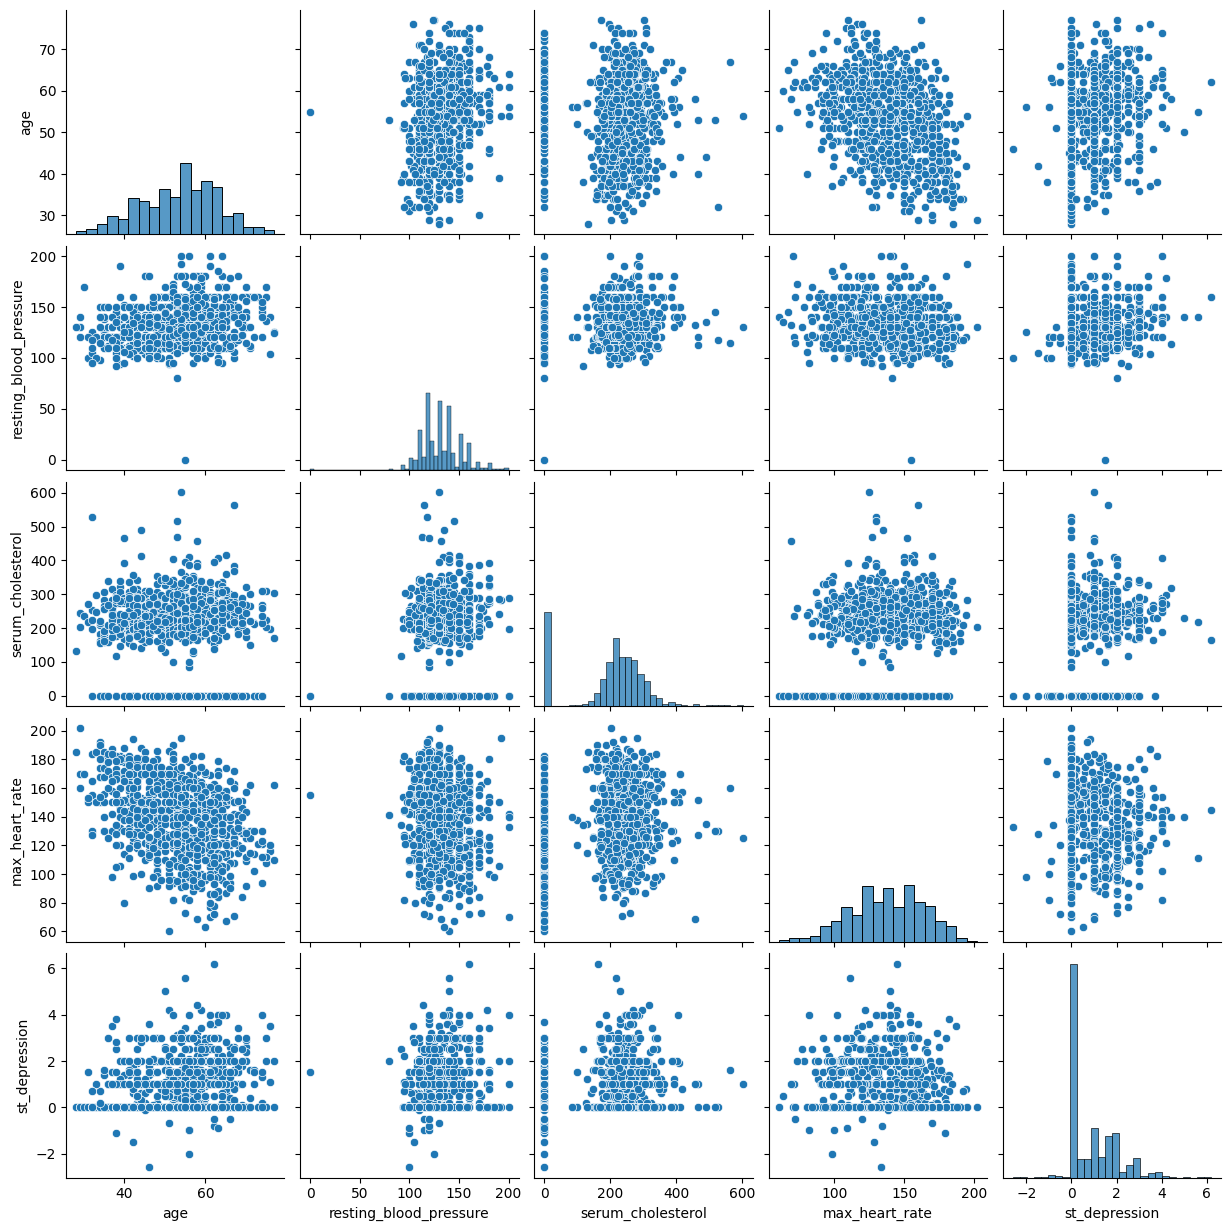

In [ ]:
columns_to_plot = ['age' ,'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate', 'st_depression' ]
sns.pairplot(df[columns_to_plot])
plt.show()

non numerical data plots

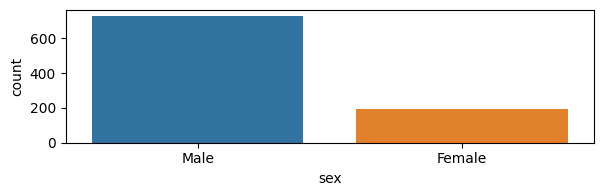

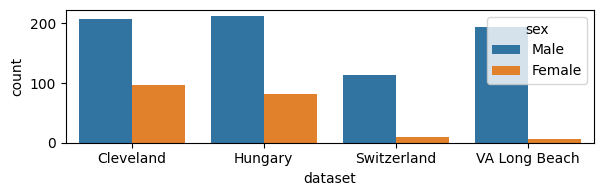

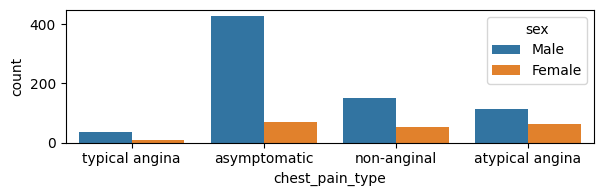

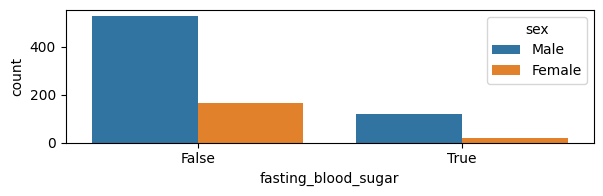

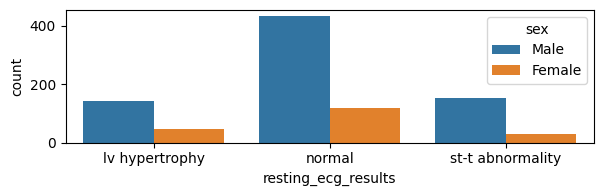

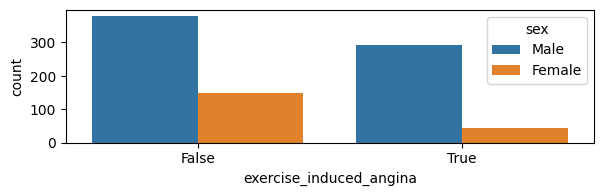

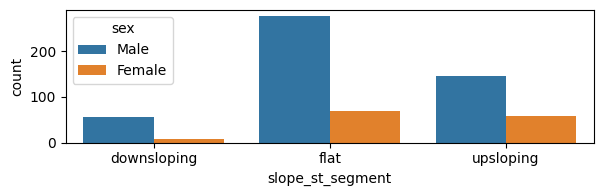

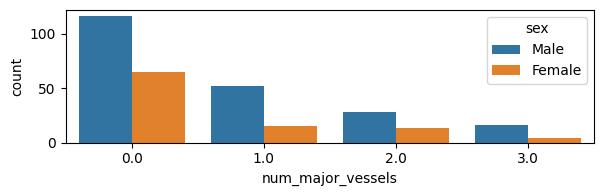

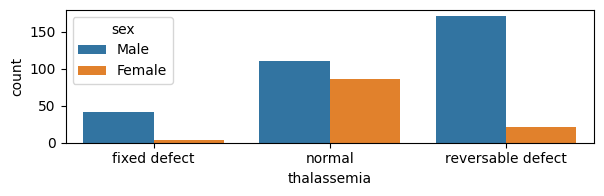

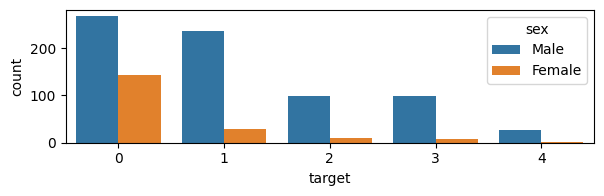

In [ ]:
feature = ['sex', 'dataset', 'chest_pain_type', 'fasting_blood_sugar',
       'resting_ecg_results', 'exercise_induced_angina','slope_st_segment', 'num_major_vessels', 'thalassemia', 'target']
for i in enumerate(feature):
  plt.figure(figsize=(15,10))
  plt.subplot(5,2,i[0]+1)
  sns.countplot(x=i[1], hue = 'sex' , data = df)
  plt.show()

In [ ]:
feature = ['sex', 'dataset', 'chest_pain_type', 'fasting_blood_sugar',
       'resting_ecg_results', 'exercise_induced_angina','slope_st_segment', 'num_major_vessels', 'thalassemia', 'target']

list(enumerate(feature))

[(0, 'sex'),
 (1, 'dataset'),
 (2, 'chest_pain_type'),
 (3, 'fasting_blood_sugar'),
 (4, 'resting_ecg_results'),
 (5, 'exercise_induced_angina'),
 (6, 'slope_st_segment'),
 (7, 'num_major_vessels'),
 (8, 'thalassemia'),
 (9, 'target')]

The distribution of male and females of our data

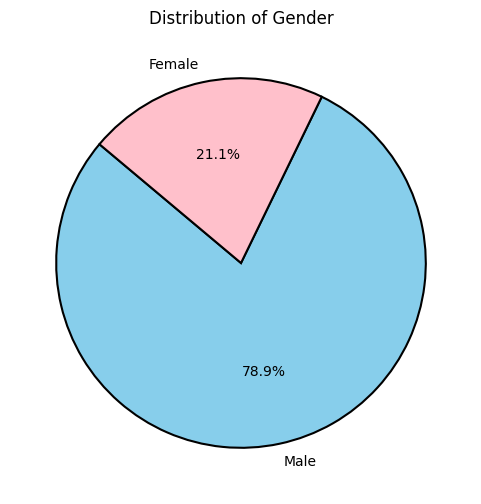

In [ ]:
#count of females and males in our dataset
sex_counts = df['sex'].value_counts()
# creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Distribution of Gender')
plt.show()

The percentages of studies on different states

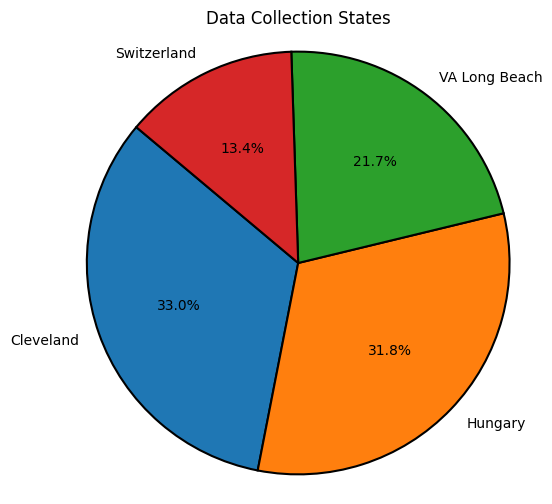

In [ ]:
#count of different states of data collection
collection_counts = df['dataset'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(collection_counts, labels=collection_counts.index, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Data Collection States')
plt.axis('equal')
plt.show()

In [ ]:
import plotly.express as px

fig = px.sunburst(df,
                  path=['sex','dataset'],
                  values='age' , color='target')

fig.show()

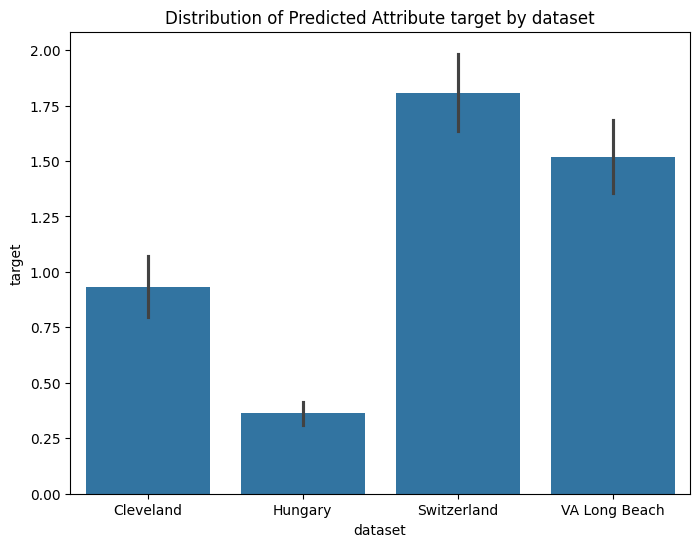

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='dataset',y='target',data=df)
plt.title('Distribution of Predicted Attribute target by dataset')
plt.show()

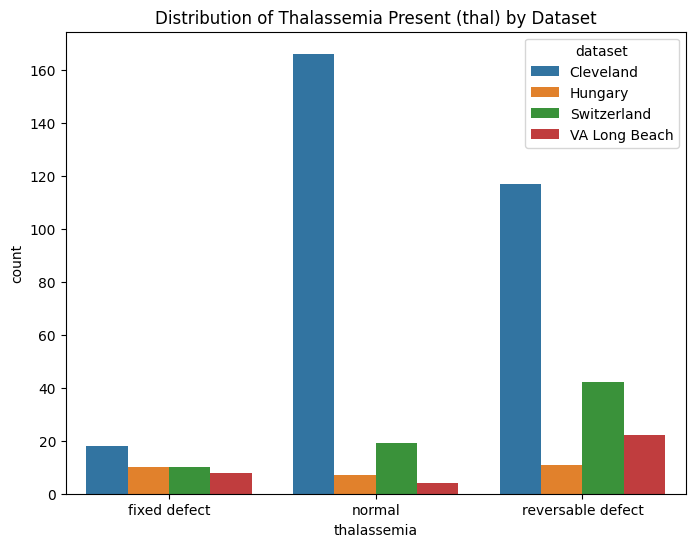

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='thalassemia', hue='dataset', data=df)
plt.title('Distribution of Thalassemia Present (thal) by Dataset')
plt.show()

the correlation between the columns

<Axes: >

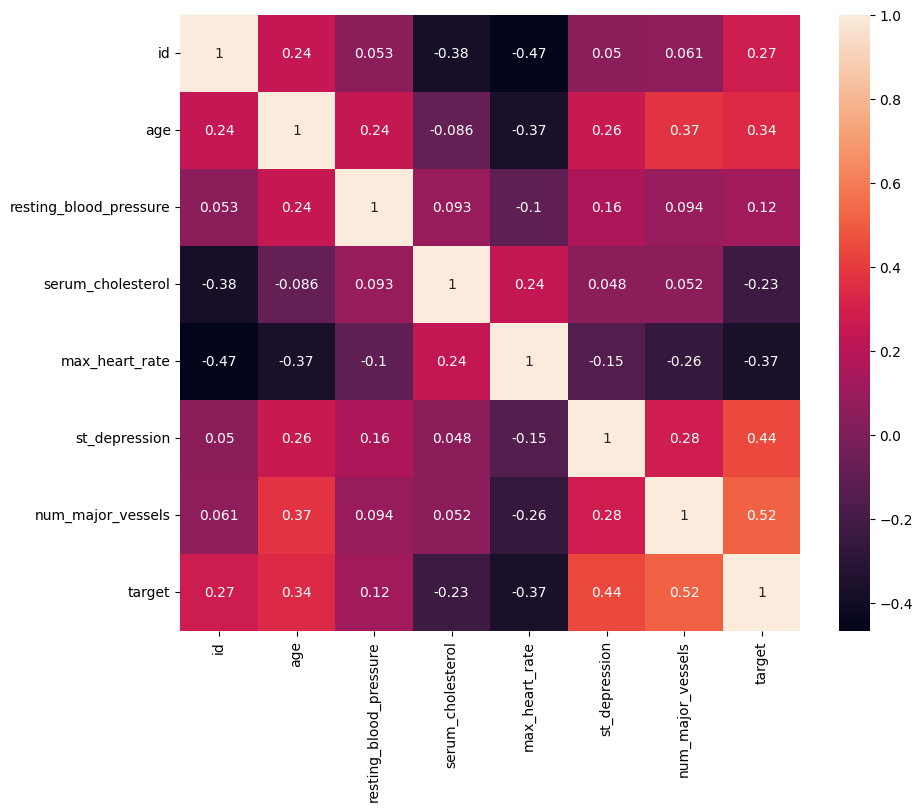

In [ ]:
#with plotting it with heatmap if needed
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Check the corr. between columns before handling the data
correlation =df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True,)





---


#Data Preprocessing



##Handling Missing Values:

In [ ]:
# Checking for missing values
total=df.isnull().sum().sort_values(ascending=False)
percent1=df.isnull().sum()/df.isnull().count()*100
percent2=(round(percent1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent2],axis=1,keys=['total','%'])
missing_data

,total,%
num_major_vessels,611,66.400
thalassemia,486,52.800
slope_st_segment,309,33.600
fasting_blood_sugar,90,9.800
st_depression,62,6.700
resting_blood_pressure,59,6.400
max_heart_rate,55,6.000
exercise_induced_angina,55,6.000
serum_cholesterol,30,3.300
resting_ecg_results,2,0.200


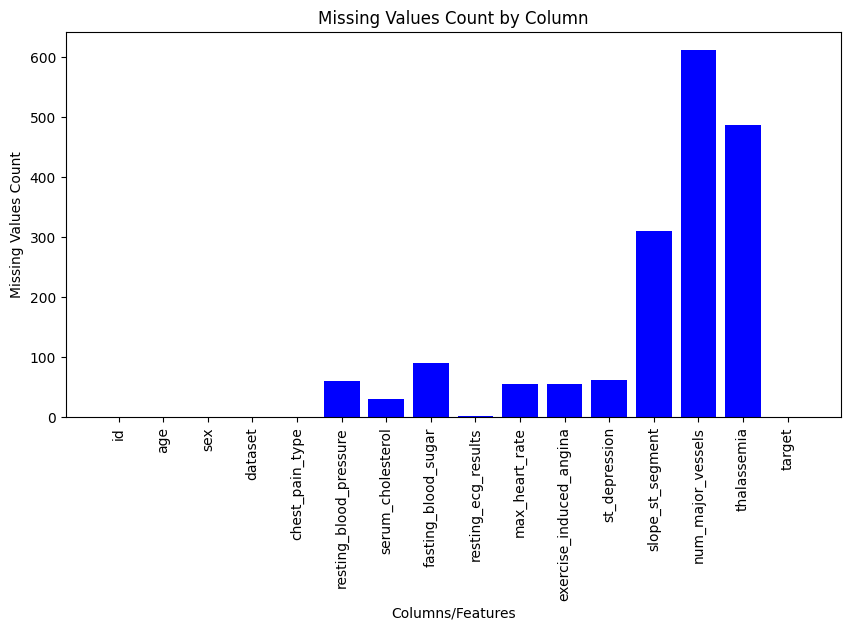

In [ ]:
#The count of all columns of null values
missing_values = df.isnull().sum()

plt.figure(figsize=(10,5))
plt.bar(missing_values.index, missing_values.values, color="blue")
plt.xlabel('Columns/Features')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count by Column')
plt.xticks(rotation=90, ha='center')
plt.show()

In [ ]:
#Drop Columns with a substantial number of missing values
df.drop(['num_major_vessels'], axis=1, inplace=True)

###Numeric features Imputation:

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features_with_nulls = df[numerical_features].columns[df[numerical_features].isnull().any()]
print("\nNumerical Features with Null Values:")
print(numerical_features_with_nulls)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns



Numerical Features with Null Values:
Index(['resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate',
       'st_depression'],
      dtype='object')


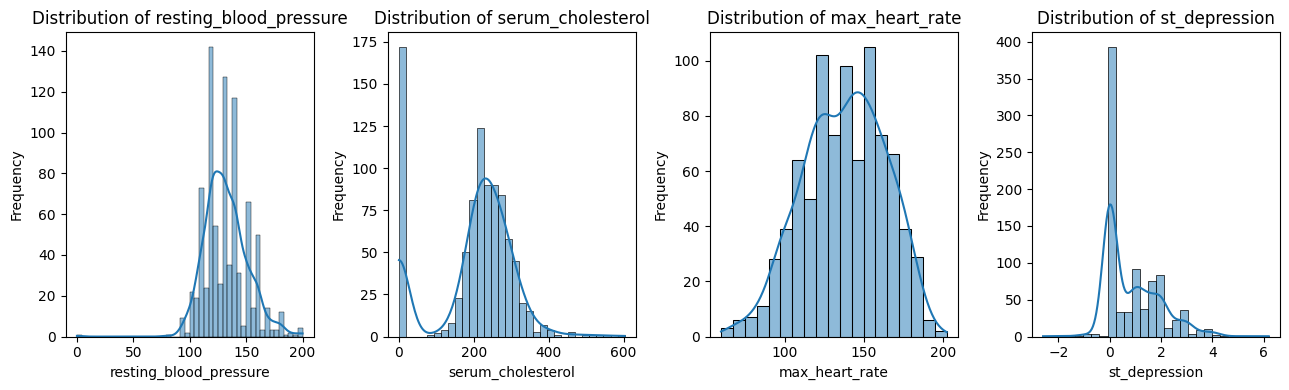

In [ ]:
fig, axes = plt.subplots(1, len(numerical_features_with_nulls), figsize=(13, 4))

for i, feature in enumerate(numerical_features_with_nulls):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Create an object of IterativeImputer
numerical_imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit and transform the data
df[numerical_features_with_nulls] = numerical_imputer.fit_transform(df[numerical_features_with_nulls])


In [ ]:
# Checking null values
df.isnull().sum().sort_values(ascending=False)

thalassemia                486
slope_st_segment           309
fasting_blood_sugar         90
exercise_induced_angina     55
resting_ecg_results          2
id                           0
age                          0
sex                          0
dataset                      0
chest_pain_type              0
resting_blood_pressure       0
serum_cholesterol            0
max_heart_rate               0
st_depression                0
target                       0
dtype: int64

###Categorical features Imputation:

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features_with_nulls = df[categorical_features].columns[df[categorical_features].isnull().any()]
print("\nCategorical Features with Null Values:")
print(categorical_features_with_nulls)


Categorical Features with Null Values:
Index(['fasting_blood_sugar', 'resting_ecg_results', 'exercise_induced_angina',
       'slope_st_segment', 'thalassemia'],
      dtype='object')


In [ ]:
#mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features_with_nulls] = categorical_imputer.fit_transform(df[categorical_features_with_nulls])

In [ ]:
# Checking null values
df.isnull().sum().sort_values(ascending=False)

id                         0
age                        0
sex                        0
dataset                    0
chest_pain_type            0
resting_blood_pressure     0
serum_cholesterol          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
slope_st_segment           0
thalassemia                0
target                     0
dtype: int64

#Dealing With Outliers

###Deleting Unnecessary Columns

In [ ]:
df.drop('id', axis=1, inplace=True)


##Cheaking Outliers


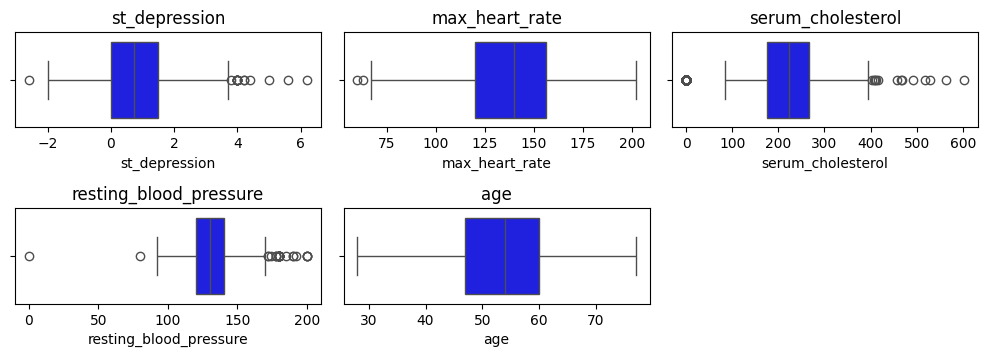

In [ ]:
numerical_cols = ['st_depression', 'max_heart_rate', 'serum_cholesterol', 'resting_blood_pressure', 'age']
plt.figure(figsize=(10, 5))

color = 'blue'

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color=color)
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# as we can see that we have outliers in trestbps and chol, because they cannot be zero
# Other Values Have some Meaningfull Insight,so we Cannot remove them
# print the row where trestbps=0
df[df['resting_blood_pressure']==0]

,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,slope_st_segment,thalassemia,target
753,55,Male,VA Long Beach,non-anginal,0.000,0.000,False,normal,155.000,False,1.500,flat,normal,3


In [ ]:
#remove the row where both trestbps and chol are zero
df.drop(df[df['resting_blood_pressure'] == 0].index,inplace=True)

In [ ]:
df.shape

(919, 14)

#Data Scaling and Normalization

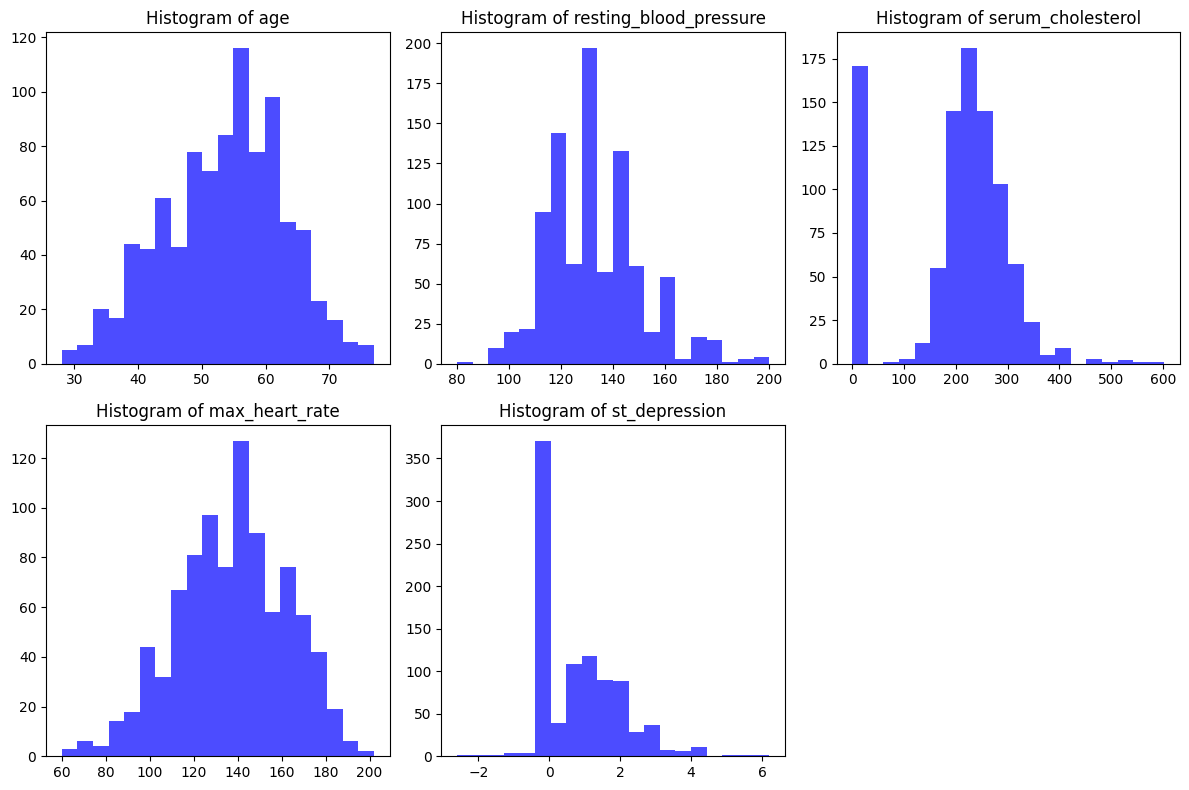

In [ ]:
##Visualize the data before scaling
numerical_columns =["age","resting_blood_pressure","serum_cholesterol","max_heart_rate","st_depression"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

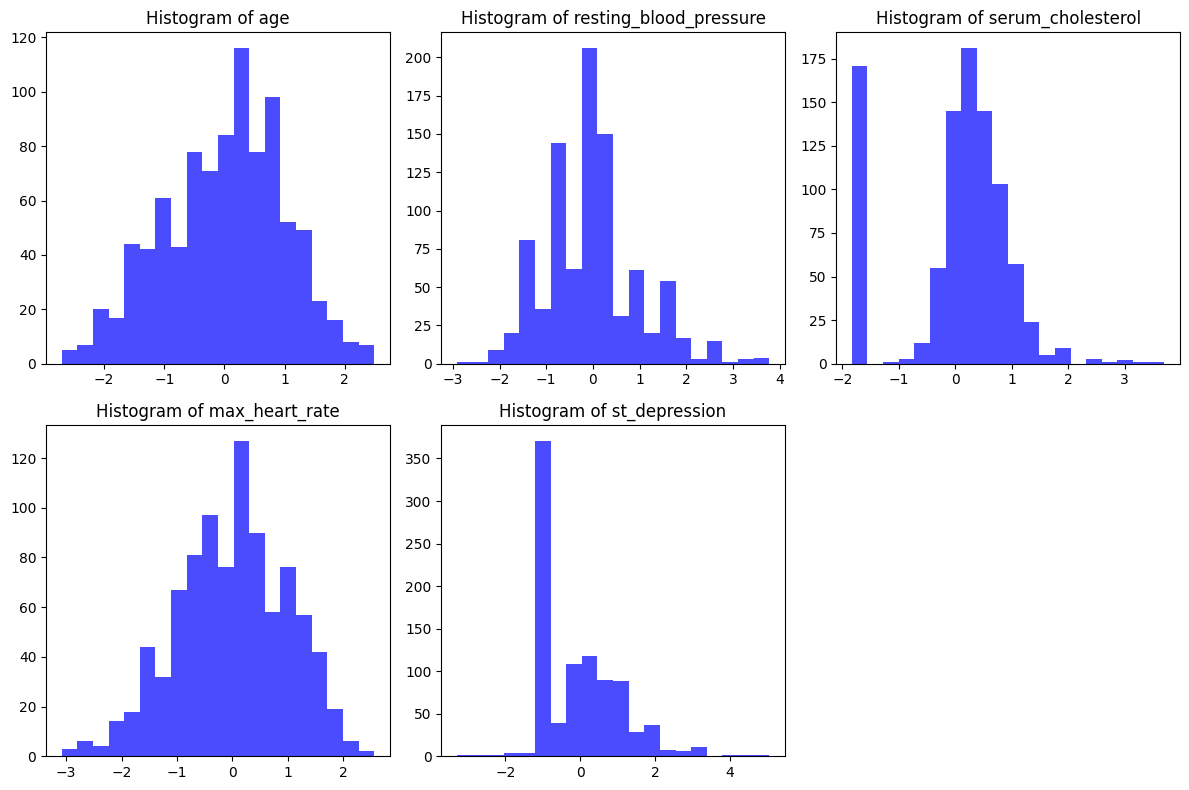

In [ ]:
#Using StandaredScaler

scaling = StandardScaler()

df[numerical_columns] = scaling.fit_transform(df[numerical_columns])

#visualize after applying scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

##Encoding

In [ ]:
#creating a function to display columns values
categorical_columns = ['sex','dataset','thalassemia', 'slope_st_segment', 'exercise_induced_angina', 'resting_ecg_results','fasting_blood_sugar', 'chest_pain_type']
def displayUnique(list):
  for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()
#before the encoding
displayUnique(categorical_columns)

Unique values in column 'sex':
['Male' 'Female']

Unique values in column 'dataset':
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']

Unique values in column 'thalassemia':
['fixed defect' 'normal' 'reversable defect']

Unique values in column 'slope_st_segment':
['downsloping' 'flat' 'upsloping']

Unique values in column 'exercise_induced_angina':
[False True]

Unique values in column 'resting_ecg_results':
['lv hypertrophy' 'normal' 'st-t abnormality']

Unique values in column 'fasting_blood_sugar':
[True False]

Unique values in column 'chest_pain_type':
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']



In [ ]:
label_encoders = {}
for column in categorical_columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

displayUnique(categorical_columns)

Unique values in column 'sex':
[1 0]

Unique values in column 'dataset':
[0 1 2 3]

Unique values in column 'thalassemia':
[0 1 2]

Unique values in column 'slope_st_segment':
[0 1 2]

Unique values in column 'exercise_induced_angina':
[0 1]

Unique values in column 'resting_ecg_results':
[0 1 2]

Unique values in column 'fasting_blood_sugar':
[1 0]

Unique values in column 'chest_pain_type':
[3 0 2 1]



In [ ]:
df.head(1)

,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,slope_st_segment,thalassemia,target
0,1.007,1,0,3,0.710,0.309,1,0,0.496,0,1.349,0,0,0


#EDA after encoding

In [ ]:

fig1 = px.scatter(df, x='age', y='serum_cholesterol', color='sex', size='fasting_blood_sugar', hover_data=['chest_pain_type', 'dataset'])


fig1.update_layout(title='Age vs Cholesterol (colored by gender, sized by resting_blood_pressure)')


fig1.show()



---


#Feature Selection


In [ ]:
X = df.drop("target",axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize and train a LightGBM model
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 735, number of used features: 13
[LightGBM] [Info] Start training from score -0.782759
[LightGBM] [Info] Start training from score -1.271994
[LightGBM] [Info] Start training from score -2.145523
[LightGBM] [Info] Start training from score -2.181030
[LightGBM] [Info] Start training from score -3.421817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

LGBMClassifier()

In [ ]:
print("model :",lgb_model)
print("")
expected_y = y_test
predicted_y = lgb_model.predict(X_test)

# summarize the fit of the model
print("metrics classification_report: \n",metrics.classification_report(expected_y, predicted_y))
print("metrics confusion_matrix :\n",metrics.confusion_matrix(expected_y, predicted_y))

model : LGBMClassifier()

metrics classification_report: 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        75
           1       0.55      0.53      0.54        59
           2       0.38      0.43      0.41        23
           3       0.44      0.35      0.39        23
           4       0.00      0.00      0.00         4

    accuracy                           0.59       184
   macro avg       0.42      0.42      0.42       184
weighted avg       0.57      0.59      0.58       184

metrics confusion_matrix :
 [[59 11  4  1  0]
 [18 31  8  2  0]
 [ 1  6 10  5  1]
 [ 4  8  2  8  1]
 [ 0  0  2  2  0]]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 735, number of used features: 13
[LightGBM] [Info] Start training from score -0.782759
[LightGBM] [Info] Start training from score -1.271994
[LightGBM] [Info] Start training from score -2.145523
[LightGBM] [Info] Start training from score -2.181030
[LightGBM] [Info] Start training from score -3.421817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

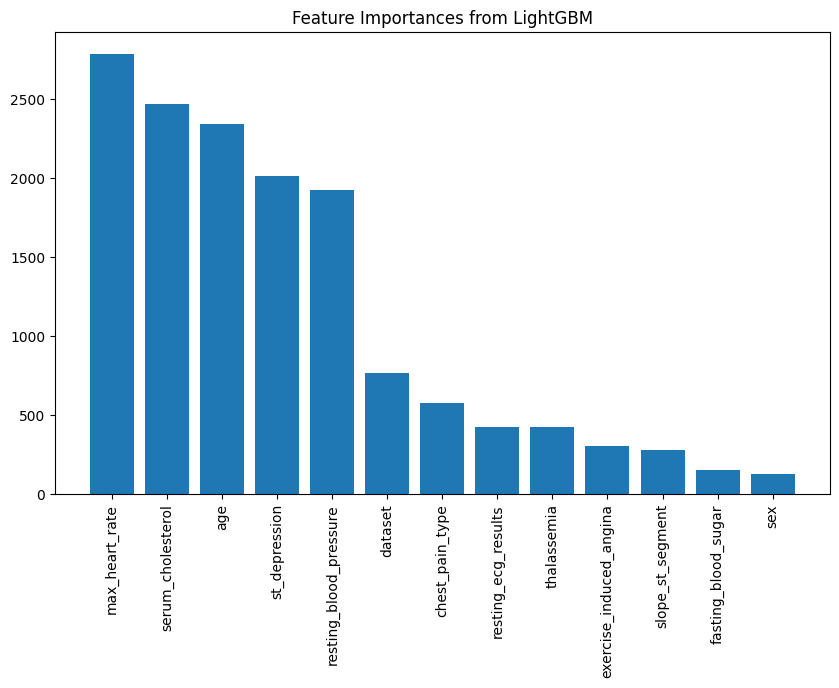

In [ ]:
# LightGBM Feature Importance
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_importances = lgb_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
indices = np.argsort(lgb_importances)[::-1]
plt.bar(range(X_train.shape[1]), lgb_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Feature Importances from LightGBM")
plt.show()



---


#Model Building

## Validation and modeling


In [ ]:
num_counts = df['target'].value_counts()
num_counts

target
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

In [ ]:
#the target is imbalanced so we are going to use StratifiedKFold
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#Define models and their hyperparameter grids
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Naive Bayes Classifier': GaussianNB()
}

param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 8],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 8]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 8]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'KNeighbors Classifier': {
        'n_neighbors': [3, 5, 7, 9]
    },
    'Decision Tree Classifier': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost Classifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Support Vector Machine': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    }
}

# StratifiedKFold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_model = None
best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_f1 = 0.0

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    print(f"Training and validating {name}...")

    # Define parameter grid
    param_grid = param_grids.get(name, {})

    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Access best model and score from GridSearchCV
        best_grid_model = grid_search.best_estimator_
        best_grid_score = grid_search.best_score_
    else:
        # If no parameter grid is provided, use the default model
        best_grid_model = model
        best_grid_model.fit(X_train, y_train)
        best_grid_score = cross_val_score(model, X_train, y_train, cv=skf).mean()

    # Train the best model from GridSearchCV on entire training data
    best_grid_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_grid_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store metrics
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

    print("Model:", name)
    print("GridSearchCV Best Accuracy:", best_grid_score)
    print("Test Accuracy with Best GridSearchCV Model:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

    # Update best model and accuracy if current model is better
    if accuracy > best_accuracy:
        best_model = best_grid_model
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_f1 = f1

print('--------------------------------------------------------------------')
print("Best Overall Model:", best_model)
print("Best Overall Accuracy:", best_accuracy)
print("Best Overall Precision:", best_precision)
print("Best Overall Recall:", best_recall)
print("Best Overall F1 Score:", best_f1)
# it takes 7 mins to execute

Training and validating Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Model: Random Forest
GridSearchCV Best Accuracy: 0.5972789115646259
Test Accuracy with Best GridSearchCV Model: 0.5652173913043478
Precision: 0.5163362545733005
Recall: 0.5652173913043478
F1 Score: 0.5101721145199406

Training and validating Gradient Boosting...
Model: Gradient Boosting
GridSearchCV Best Accuracy: 0.5714285714285714
Test Accuracy with Best GridSearchCV Model: 0.5706521739130435
Precision: 0.5544571583574142
Recall: 0.5706521739130435
F1 Score: 0.5429614545507415

Training and validating XGBoost...
Model: XGBoost
GridSearchCV Best Accuracy: 0.5782312925170068
Test Accuracy with Best GridSearchCV Model: 0.5489130434782609
Precision: 0.5134074145962731
Recall: 0.5489130434782609
F1 Score: 0.5226627532915464

Training and validating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Model: Logistic Regression
GridSearchCV Best Accuracy: 0.5836734693877552
Test Accuracy with Best GridSearchCV Model: 0.5434782608695652
Precision: 0.4968132232197869
Recall: 0.5434782608695652
F1 Score: 0.49927733089781257

Training and validating KNeighbors Classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Model: KNeighbors Classifier
GridSearchCV Best Accuracy: 0.5768707482993196
Test Accuracy with Best GridSearchCV Model: 0.5108695652173914
Precision: 0.44932698866556403
Recall: 0.5108695652173914
F1 Score: 0.47150890451301913

Training and validating Decision Tree Classifier...
Model: Decision Tree Classifier
GridSearchCV Best Accuracy: 0.5156462585034014
Test Accuracy with Best GridSearchCV Model: 0.5
Precision: 0.4749546291255089
Recall: 0.5
F1 Score: 0.48457340353313744

Training and validating AdaBoost Classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Model: AdaBoost Classifier
GridSearchCV Best Accuracy: 0.583673469387755
Test Accuracy with Best GridSearchCV Model: 0.5271739130434783
Precision: 0.44573698637572606
Recall: 0.5271739130434783
F1 Score: 0.46347844837733243

Training and validating Support Vector Machine...
Model: Support Vector Machine
GridSearchCV Best Accuracy: 0.5850340136054422
Test Accuracy with Best GridSearchCV Model: 0.5543478260869565
Precision: 0.4446574145962732
Recall: 0.5543478260869565
F1 Score: 0.48058446342199207

Training and validating Naive Bayes Classifier...
Model: Naive Bayes Classifier
GridSearchCV Best Accuracy: 0.5659863945578232
Test Accuracy with Best GridSearchCV Model: 0.4945652173913043
Precision: 0.48765745124440785
Recall: 0.4945652173913043
F1 Score: 0.49050531904045164

--------------------------------------------------------------------
Best Overall Model: GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)
Best Overall Accuracy: 0.5706521739130435
Best Overall Precision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



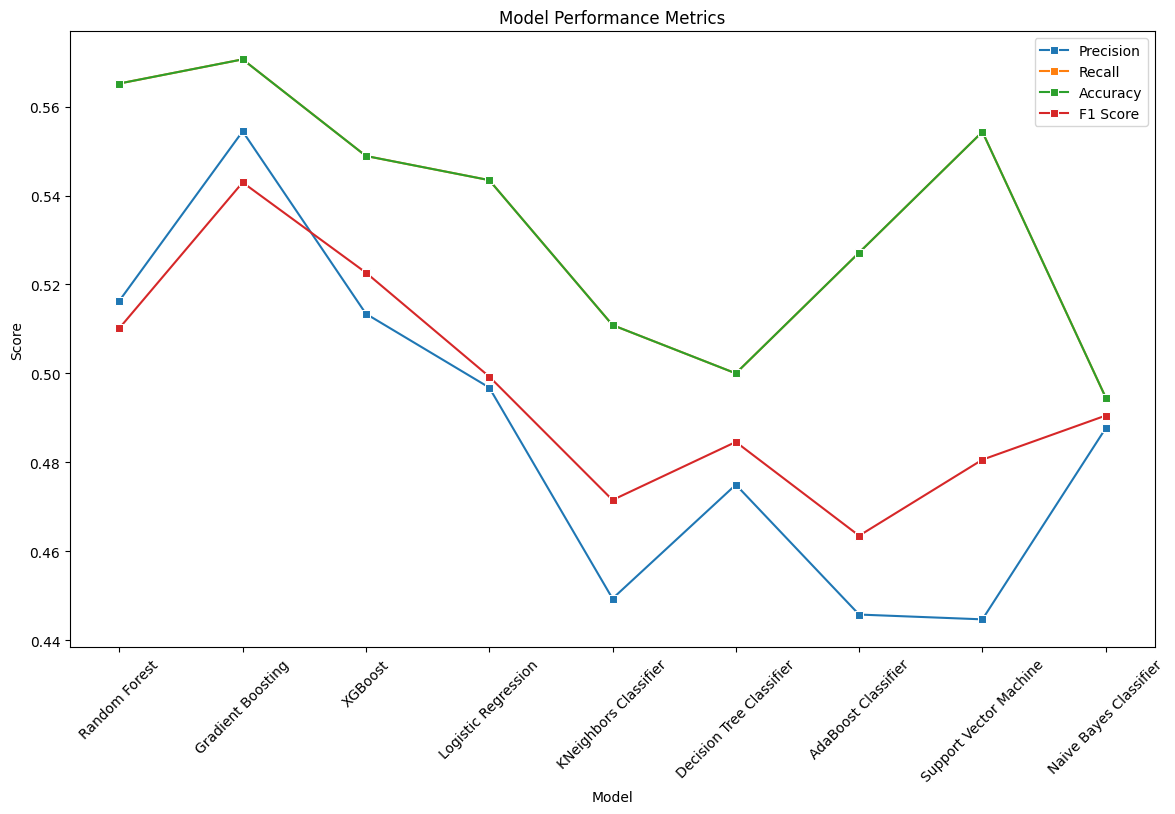

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.565,0.516,0.565,0.510
1,Gradient Boosting,0.571,0.554,0.571,0.543
2,XGBoost,0.549,0.513,0.549,0.523
3,Logistic Regression,0.543,0.497,0.543,0.499
4,KNeighbors Classifier,0.511,0.449,0.511,0.472
5,Decision Tree Classifier,0.500,0.475,0.500,0.485
6,AdaBoost Classifier,0.527,0.446,0.527,0.463
7,Support Vector Machine,0.554,0.445,0.554,0.481
8,Naive Bayes Classifier,0.495,0.488,0.495,0.491


In [ ]:
# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)


# Plot metrics
plt.figure(figsize=(14, 8))


# Precision plot
sns.lineplot(data=metrics_df, x='Model', y='Precision', marker='s', label='Precision')
# Recall plot
sns.lineplot(data=metrics_df, x='Model', y='Recall', marker='s', label='Recall')
# Accuracy plot
sns.lineplot(data=metrics_df, x='Model', y='Accuracy', marker='s', label='Accuracy')
# F1 Score plot
sns.lineplot(data=metrics_df, x='Model', y='F1 Score', marker='s', label='F1 Score')


plt.xticks(rotation=45)
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()

#There's an issue not showing a Recall column, we don't know why but we assumed it was a bug in a notebook
plt.show()
metrics_df

#Final Prediction File

* Row 0 predicts class 1,
* Row 1 predicts class 2,
* Row 2 predicts class 3,
* Row 3 predicts class 0,
* Row 4 predicts class 0, and so on.

In [ ]:

df_predictions = pd.DataFrame(y_pred, columns=['predicted_label'])
df_predictions.to_csv('final_predictions.csv', index=False)

print("Final predictions saved to 'final_predictions.csv'.")

df_final_p = pd.read_csv('final_predictions.csv')

df_final_p

Final predictions saved to 'final_predictions.csv'.


,predicted_label
0,1
1,2
2,3
3,0
4,0
...,...
179,1
180,1
181,0
182,1


#Model Deployment



In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'best_model.pkl')

# Load the model
#loaded_model = joblib.load('best_model.pkl')

['best_model.pkl']